<a href="https://colab.research.google.com/github/nogahm/HW_Recsys/blob/master/colab_Recsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW1

1 - Data Analysis

a - Average Ratings

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [0]:
# read data into dataframe
# MOVIELENS_DIR = "C:\\Users\\talshemt\\PycharmProjects\\HW_Recsys\\ml-100k"
MOVIELENS_DIR=''
RATING_DATA_FILE = "../u.data"
ratings = pd.read_csv(MOVIELENS_DIR+RATING_DATA_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

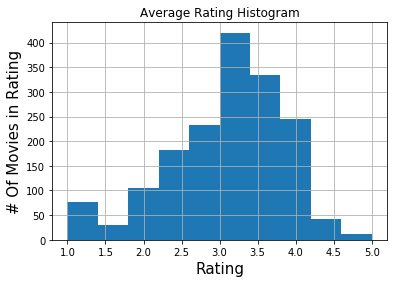

In [5]:
# get average rating for each movie and print histogram
average_rating=ratings.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating.sort_values('rating', inplace=True, ascending=False)
fig = average_rating.hist(column="rating")
plt.title("Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)

In [6]:
# print top 3 movies
average_rating.head(3)

,rating
movieid,
814,5.0
1599,5.0
1201,5.0


b - Gender Analysis

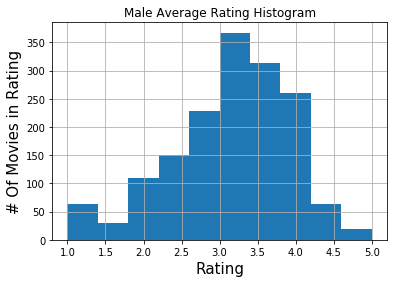

Top 3 movies by males:


,rating
movieid,
1500,5.0
1201,5.0
1605,5.0


In [10]:
# add column gender to ratings
USERS_DATA_FILE = "../u.user"
users = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'age' , 'gender' , 'occupation' , 'zip code'])
merged_users_movies=pd.merge(ratings,users)

#Male Analysis
rating_male=merged_users_movies.loc[merged_users_movies['gender'] == 'M']
average_rating_male = rating_male.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_male.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_male.hist(column="rating")
plt.title("Male Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by males:")
average_rating_male.head(3)


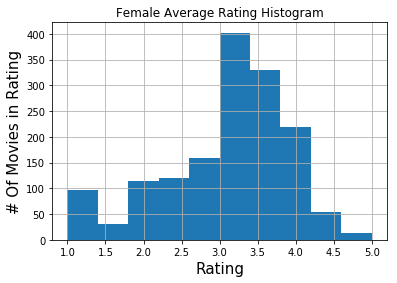

Top 3 movies by females:


,rating
movieid,
1368,5.0
1451,5.0
1594,5.0


In [11]:

#Female Analysis
rating_female=merged_users_movies.loc[merged_users_movies['gender'] == 'F']
average_rating_female = rating_female.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_female.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_female.hist(column="rating")
plt.title("Female Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by females:")
average_rating_female.head(3)

In [12]:
# get average difference between genders
average_rating_male.rename(columns = {'rating':'male_rating'}, inplace = True)
average_rating_female.rename(columns = {'rating':'female_rating'}, inplace = True)
merged_users_averages=pd.merge(average_rating_male,average_rating_female,left_index=True,right_index=True,how='outer')
# remove NAN
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['female_rating'])]
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['male_rating'])]
# get difference
difference_between_genders=merged_users_averages.apply(lambda row: (abs(row['male_rating']-row['female_rating'])), axis=1)
difference_between_genders_df = pd.DataFrame({'movieid':difference_between_genders.index, 'difference':difference_between_genders.values})
# get average difference between genders
print('Average of differences between male and female ratings: ')
print(difference_between_genders_df['difference'].mean())

# get top 5 movies with largest difference
    #sort ascending:
difference_between_genders_df.sort_values('difference', inplace=True, ascending=False)
    #print top 5
print('Top 5 movies with the greatest difference in ratings between genders: ')
difference_between_genders_df.head(5)

Average of differences between male and female ratings: 
0.508856945912609
Top 5 movies with the greatest difference in ratings between genders: 


,movieid,difference
1271,1306,4.000000
839,851,3.666667
1352,1429,3.500000
636,641,3.419355
1432,1592,3.250000


c - Genre Analysis

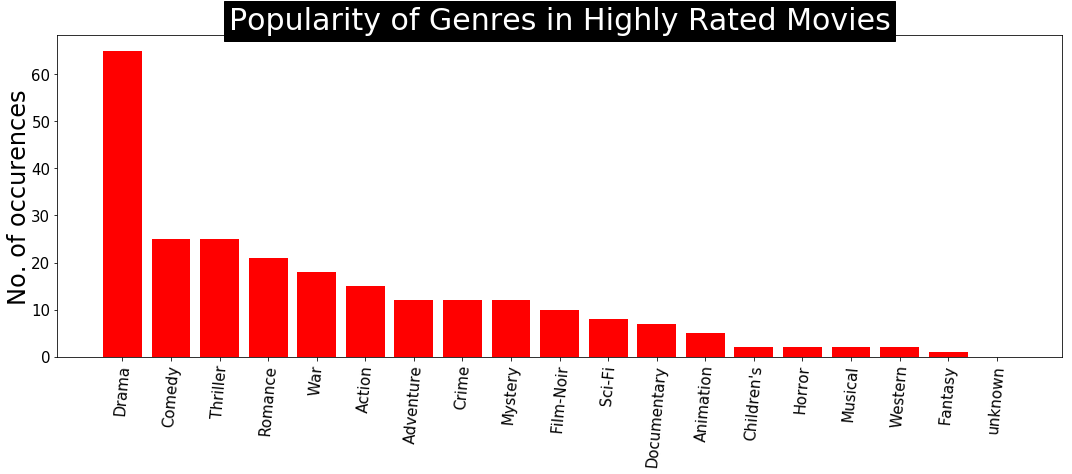

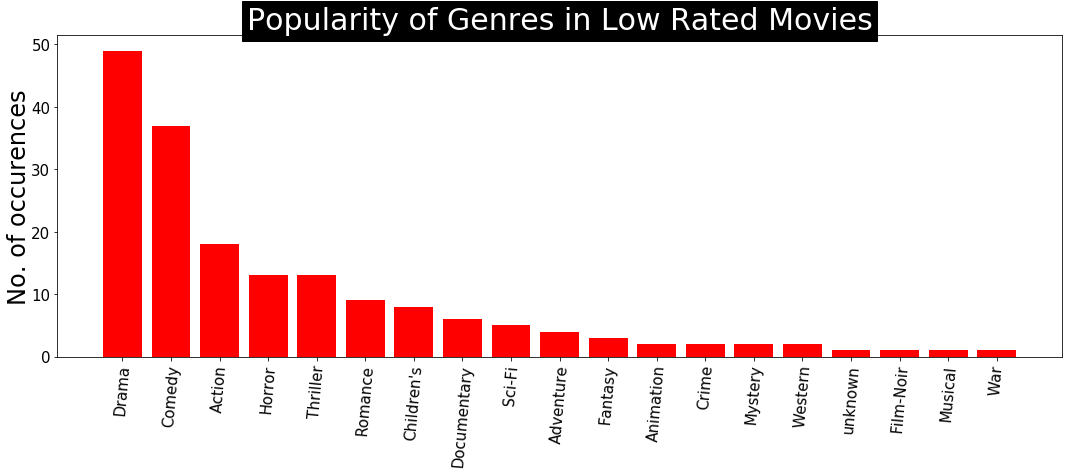

In [14]:
# add column gender to ratings
# read movie info with genre data
USERS_DATA_FILE = "../u.item"
genre = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movieid', 'movie title', 'release date', 'video release date',
              'IMDb URL',  'unknown',  'Action',  'Adventure',  'Animation',
              'Children\'s', 'Comedy',  'Crime', 'Documentary', 'Drama',  'Fantasy', 'Film-Noir','Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'])

# merge movie info with movie ratings and user data and sort by rating
merged_average_rating_genre=pd.merge(average_rating,genre, left_index=True,right_on='movieid', how='outer')

# Analyze genre distribution for high rated movies (rating bigger than 4):
high_rated_indexes = merged_average_rating_genre['rating']>4.0
high_rated = merged_average_rating_genre[high_rated_indexes]

# Count high-rated movies per genre
genres = ['unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for g in genres:
    count = 0
    genre_movies = high_rated[g] == 1
    genres_count[g] = high_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Highly Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = merged_average_rating_genre['rating']<2.0
low_rated = merged_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


Genre Distribution Analysis for Demographic Details

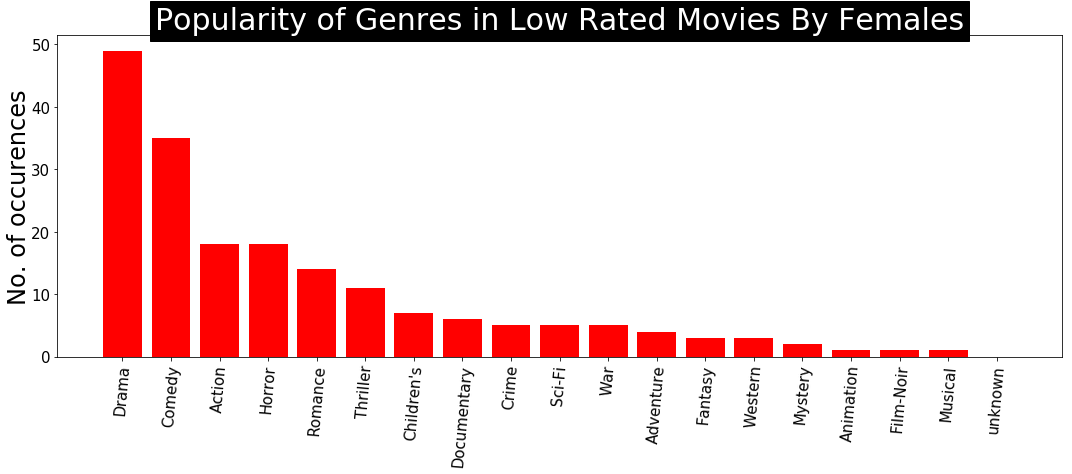

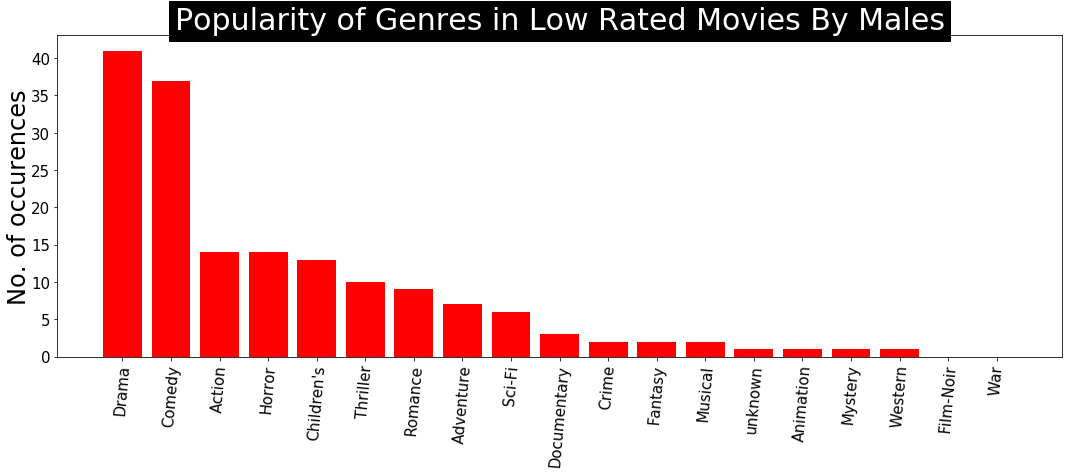

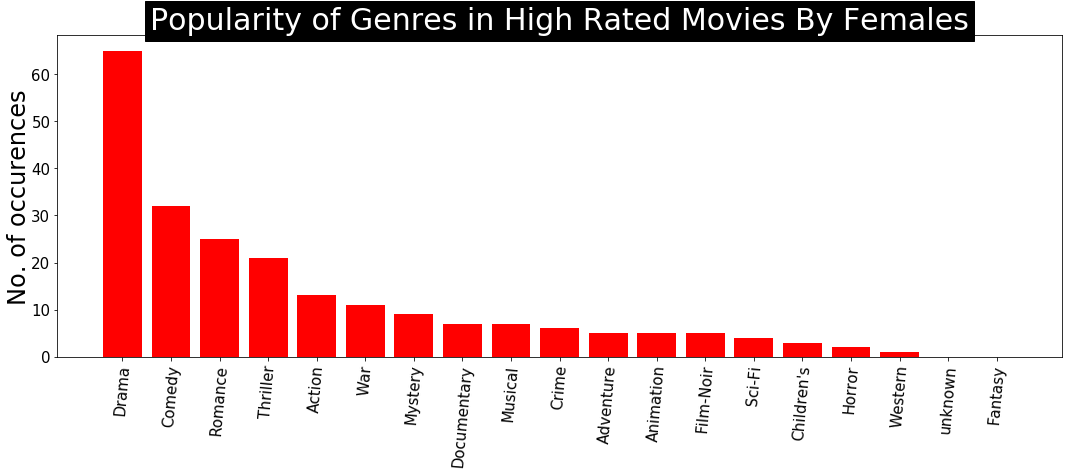

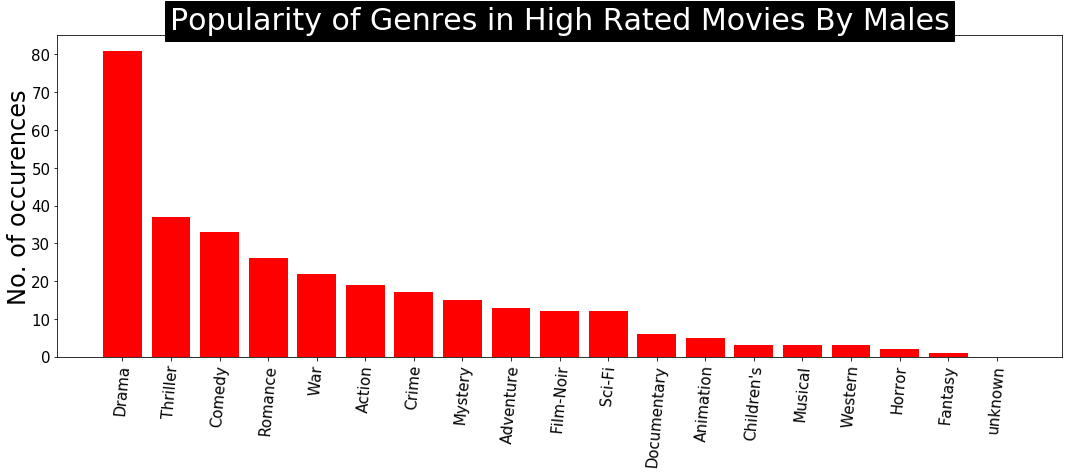

In [15]:
# Based on gender
#Female + Low Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = female_average_rating_genre['female_rating']<2.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + Low Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = male_average_rating_genre['male_rating']<2.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Female + High Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = female_average_rating_genre['female_rating']>4.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + High Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = male_average_rating_genre['male_rating']>4.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

d - Most popular movies.

We will find the movies that have the most ratings, and then out of those movies find the moives that have the highest avergae rating.

In [16]:
# Count ratings per movie
count_rating_per_movie = ratings['movieid'].value_counts()
count_rating_per_movie_df = pd.DataFrame({'movieid':count_rating_per_movie.index, 'frequency':count_rating_per_movie.values})

#Merge with average rating:
count_with_rating = pd.merge(average_rating, count_rating_per_movie_df, left_index=True, right_on='movieid', how='inner')

#Get average frequency
avg_freq = count_with_rating['frequency'].mean()

#Get movies with frequency over average frequency
high_freq_indexes = count_with_rating['frequency']>avg_freq
high_freq = count_with_rating[high_freq_indexes]

#Get movies with highest rating within movies with high rating frequency
high_freq.sort_values('rating', inplace=True, ascending=False)

#Get top 20
print('Top 20 most popular movies:')
high_freq.head(20)

Top 20 most popular movies:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,rating,movieid,frequency
305,4.491071,408,112
34,4.466443,318,298
286,4.466102,169,118
74,4.456790,483,243
483,4.447761,114,67
46,4.445230,64,283
106,4.387560,603,209
55,4.385768,12,267
0,4.358491,50,583
263,4.344000,178,125


2 - Non-personal Recommendations



a - Build and train a model based on linear regression

In [18]:
#Read training data
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score
RATING_TRAINING_FILE = "../u1.base"
RATING_TEST_FILE = "../u1.test"
ratings_training = pd.read_csv(MOVIELENS_DIR+RATING_TRAINING_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])
ratings_test = pd.read_csv(MOVIELENS_DIR+RATING_TEST_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

avg_ratings_training = ratings_training.filter(['movieid','rating']).groupby('movieid').mean()
training = pd.merge(avg_ratings_training, genre, left_index=True, right_on='movieid', how='left')
training_X = training[training.columns[6:]]
training_Y = (training.rating).values

#create and train the model
regr = linear_model.LinearRegression()
regr.fit(training_X, training_Y)

#Evaluate the model with test set
avg_ratings_test = ratings_test.filter(['movieid','rating']).groupby('movieid').mean()
test = pd.merge(avg_ratings_test, genre, left_index=True, right_on='movieid', how='left')
test_X = test[test.columns[6:]]
test_Y = (test.rating).values
test_pred = regr.predict(test_X)

# MAE
print('MAE: \n')
print(mean_absolute_error(test_Y, test_pred))

MAE: 

0.7026804223720173


b - Recommend 20 new movies for each user

In [0]:
#TODO

3 - Personal Recommendations

a - Build a model based on matrix factorization (item similarity and item content)

In [22]:
!pip install turicreate
import turicreate as tc
from datetime import datetime

#Prepare data - remove rare data
# rare_items = ratings_training.groupby('movieid', tc.aggre)

     |████████████████████████████████| 87.4MB 271kB/s 
     |████████████████████████████████| 23.8MB 12.2MB/s 
     |████████████████████████████████| 2.7MB 29.3MB/s 
ERROR: mxnet 1.1.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.16.3 which is incompatible.
ERROR: mxnet 1.1.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.21.0 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [87]:
# remove rare movies
rare_items = (tc.SFrame(ratings)).groupby('movieid', tc.aggregate.COUNT()).sort('Count')
rare_items = rare_items[rare_items['Count'] <= 5]

sframe_train = tc.SFrame.read_csv("../u1.base",sep='\t',header=False)
sframe_train = sframe_train.rename({'X1': 'userid','X2':'movieid','X3':'rating','X4':'timestamp'})

train_non_rare=sframe_train.filter_by(rare_items['movieid'], 'movieid', exclude=True)
train_non_rare['timestamp'] = train_non_rare['timestamp'].astype(datetime)

sframe_test = tc.SFrame.read_csv("../u1.test",sep='\t',header=False)
sframe_test = sframe_test.rename({'X1': 'userid','X2':'movieid','X3':'rating','X4':'timestamp'})
test_non_rare=sframe_test.filter_by(rare_items['movieid'], 'movieid', exclude=True)
test_non_rare['timestamp'] = test_non_rare['timestamp'].astype(datetime)

# get movies name, year and genres
genre_temp=genre.drop(columns=['release date','video release date','IMDb URL'])
sframe_genre=tc.SFrame(genre_temp)
train_non_rare=train_non_rare.join(sframe_genre,how='left')
train_non_rare['year'] = train_non_rare['movie title'].apply(lambda x: x[-5:-1])
train_non_rare['movie title'] = train_non_rare['movie title'].apply(lambda x: x[:-7])
test_non_rare=test_non_rare.join(sframe_genre,how='left')
test_non_rare['year'] = test_non_rare['movie title'].apply(lambda x: x[-5:-1])
test_non_rare['movie title'] = test_non_rare['movie title'].apply(lambda x: x[:-7])

Finished parsing file /u1.base

Parsing completed. Parsed 100 lines in 0.063604 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /u1.base

Parsing completed. Parsed 80000 lines in 0.065239 secs.

Finished parsing file /u1.test

Parsing completed. Parsed 100 lines in 0.030799 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /u1.test

Parsing completed. Parsed 20000 lines in 0.031988 secs.

In [101]:
# create and train the model
model = tc.recommender.create(train_non_rare.remove_column('timestamp'), 'userid', 'movieid', target='rating', item_data=sframe_genre)

Preparing data set.

Data has 79226 observations with 943 users and 1682 items.

Data prepared in: 0.467485s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 79226 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.16279           | Not Viable                               |

| 1       | 0.290698          | 0.641294                                 |

| 2       | 0.145349          | 0.411712                                 |

| 3       | 0.0726744         | 0.573381                                 |

| 4       | 0.0363372         | 1.06659                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.145349          | 0.411712                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 157us        | 2.43184           | 1.1136                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 4.19s        | 2.78615           | 1.50249               | 0.145349    |

| 2       | 8.24s        | 1.06833           | 0.8991                | 0.145349    |

| 3       | 12.09s       | 0.876367          | 0.832539              | 0.145349    |

| 4       | 15.84s       | 0.770222          | 0.793017              | 0.145349    |

| 5       | 19.44s       | 0.702647          | 0.766635              | 0.145349    |

| 7       | 26.48s       | 0.609514          | 0.726755              | 0.145349    |

| 8       | 29.87s       | 0.578527          | 0.711715              | 0.145349    |

| 9       | 33.18s       | 0.549887          | 0.697581              | 0.145349    |

| 10      | 36.46s       | 0.527922          | 0.685934              | 0.145349    |

| 11      | 39.65s       | 0.508284          | 0.676296              | 0.145349    |

| 12      | 42.85s       | 0.491784          | 0.666649              | 0.145349    |

| 13      | 46.01s       | 0.475528          | 0.657398              | 0.145349    |

| 14      | 49.14s       | 0.46196           | 0.649677              | 0.145349    |

| 15      | 52.22s       | 0.450114          | 0.642112              | 0.145349    |

| 16      | 55.30s       | 0.436718          | 0.634793              | 0.145349    |

| 17      | 58.37s       | 0.427525          | 0.62786               | 0.145349    |

| 18      | 1m 1s        | 0.417597          | 0.621795              | 0.145349    |

| 19      | 1m 4s        | 0.408532          | 0.615682              | 0.145349    |

| 20      | 1m 7s        | 0.399505          | 0.610151              | 0.145349    |

| 21      | 1m 10s       | 0.392587          | 0.60538               | 0.145349    |

| 22      | 1m 13s       | 0.383953          | 0.599341              | 0.145349    |

| 23      | 1m 16s       | 0.378018          | 0.595286              | 0.145349    |

| 24      | 1m 19s       | 0.37259           | 0.591388              | 0.145349    |

| 25      | 1m 22s       | 0.365735          | 0.586117              | 0.145349    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.343412

Final training RMSE: 0.5665

In [104]:
results = model.recommend()
results.print_rows(num_rows=9430)

+--------+---------+--------------------+------+
| userid | movieid |       score        | rank |
+--------+---------+--------------------+------+
|   1    |   513   | 4.441953142975226  |  1   |
|   1    |   455   | 4.433953623172247  |  2   |
|   1    |   210   | 4.382442292103779  |  3   |
|   1    |   651   | 4.334741940592185  |  4   |
|   1    |    81   | 4.312604614287384  |  5   |
|   1    |   174   | 4.2311698358256855 |  6   |
|   1    |   250   | 4.201382011249198  |  7   |
|   1    |   318   | 4.142312847763069  |  8   |
|   1    |    82   | 4.140633039628856  |  9   |
|   1    |   1039  | 4.125559218098179  |  10  |
|   2    |   183   | 4.433858436111596  |  1   |
|   2    |   427   | 4.386174127911918  |  2   |
|   2    |   423   | 4.319866054270652  |  3   |
|   2    |   134   |  4.24872948053363  |  4   |
|   2    |    8    | 4.223924601553708  |  5   |
|   2    |   121   | 4.192818077675302  |  6   |
|   2    |   511   | 4.1896037410346345 |  7   |
|   2    |   194   |

In [103]:
similar_items = model.get_similar_items()
similar_items.print_rows(num_rows=12980)

+---------+---------+---------------------+------+
| movieid | similar |        score        | rank |
+---------+---------+---------------------+------+
|    1    |   531   |  0.5531163811683655 |  1   |
|    1    |    71   |  0.5261253714561462 |  2   |
|    1    |   946   |  0.5119383931159973 |  3   |
|    1    |   267   |  0.4862474501132965 |  4   |
|    1    |   983   | 0.47747617959976196 |  5   |
|    1    |   214   |  0.4744553864002228 |  6   |
|    1    |   161   | 0.47311341762542725 |  7   |
|    1    |   634   |  0.4630284905433655 |  8   |
|    1    |   1372  | 0.45729443430900574 |  9   |
|    1    |   997   | 0.45589572191238403 |  10  |
|    2    |   1228  |  0.5059455633163452 |  1   |
|    2    |   208   |  0.4720191955566406 |  2   |
|    2    |   364   |  0.4695813059806824 |  3   |
|    2    |   1268  | 0.46906131505966187 |  4   |
|    2    |   1086  | 0.46648865938186646 |  5   |
|    2    |   1620  |  0.4579415023326874 |  6   |
|    2    |   1041  |  0.448022